In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [3]:
df = pd.read_csv("marketing_campaign.csv", sep=";")

In [4]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [27]:
Q1 = df["Income"].quantile(.25)
Q3 = df["Income"].quantile(.75)

def income_sgmt(x):
    if (x is None) or (type(x) not in [int, float]) :
        segment = "None"
    else:
        if x >= Q3:
            segment = "High"
        elif x < Q3 and x >= Q1:
            segment = "Medium"
        else:
            segment = "Low"
    return segment

df["Income_sgmt"] = df["Income"].fillna("None")
df["Income_sgmt"] = df["Income_sgmt"].apply(lambda x: income_sgmt(x))

In [28]:
# product
dfg3 = df.groupby(["Income_sgmt","MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds"]).agg({"ID":"nunique"}).reset_index()
dfg3.rename(columns={"MntWines":"Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweet","MntGoldProds":"Gold"}, inplace=True)
df_pivot =pd.pivot_table(dfg3,
                         index = ['Income_sgmt'],
                         values = ['Wines','Fruits','Meat','Fish','Sweet','Gold'],
                         aggfunc = {'Wines':['sum'],'Fruits':['sum'],'Meat':['sum'],'Fish':['sum'],'Sweet':['sum'],'Gold':['sum']}
                        )
df_pivot = df_pivot.reset_index()
df_pivot.columns = ['Income_sgmt','Wines','Fruits','Meat','Fish','Sweet','Gold']
df_pivot

,Income_sgmt,Wines,Fruits,Meat,Fish,Sweet,Gold
0,High,44761,30543,36057,221083,32960,319949
1,Low,4313,2980,8438,11500,2963,10699
2,Medium,26422,19618,43303,104974,18826,282508
3,None,652,512,1182,3905,725,4733


Text(0.5, 1.0, 'Income vs Product')

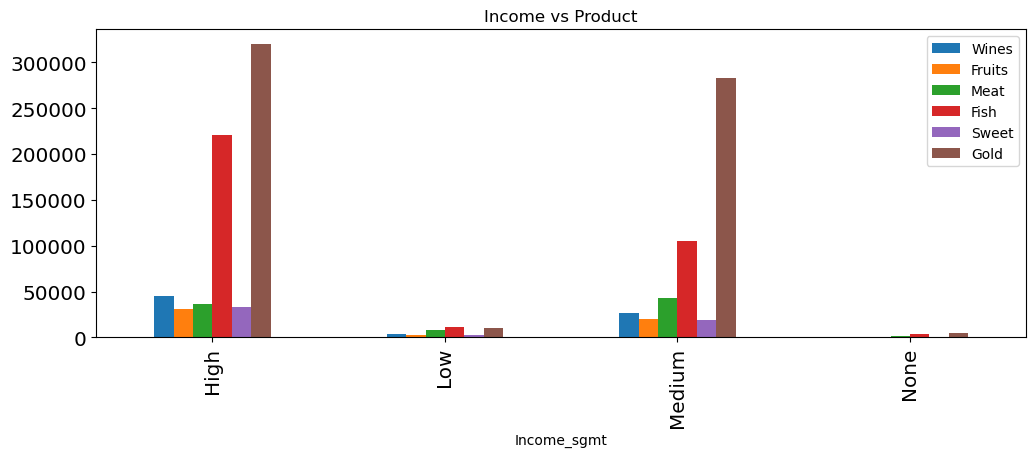

In [29]:
df_pivot.plot(x="Income_sgmt", y=["Wines", "Fruits","Meat","Fish","Sweet","Gold"], kind="bar")
plt.title('Income vs Product')

Customer dengan income High dan Medium lebih suka dengan produk Gold dan Fish. Oleh karena itu, jika ingin membuat campaign disarankan untuk memberikan campaign produk Gold dan Fish untuk cutomer dengan income tersebut.

In [33]:
# product
dfg4 = df.groupby(["Income_sgmt","NumDealsPurchases","NumWebPurchases","NumCatalogPurchases","NumStorePurchases"]).agg({"ID":"nunique"}).reset_index()
dfg4.rename(columns={"NumDealsPurchases":"Deals","NumWebPurchases":"Website","NumCatalogPurchases":"Catalog","NumStorePurchases":"Store"}, inplace=True)
df_pivot2 =pd.pivot_table(dfg4,
                         index = ['Income_sgmt'],
                         values = ['Deals','Website','Catalog','Store'],
                         aggfunc = {'Deals':['sum'],'Website':['sum'],'Catalog':['sum'],'Store':['sum']}
                        )
df_pivot2 = df_pivot2.reset_index()
df_pivot2.columns = ['Income_sgmt','Deals','Website','Catalog','Store']
df_pivot2

,Income_sgmt,Deals,Website,Catalog,Store
0,High,2311,619,3372,2213
1,Low,133,345,385,393
2,Medium,1977,2184,4568,3602
3,None,44,56,108,94


Text(0.5, 1.0, 'Income vs Purchase Type')

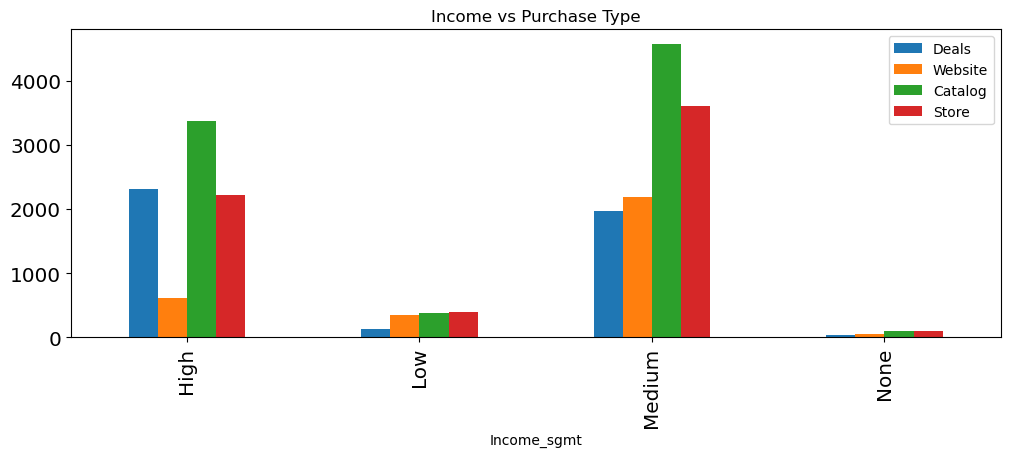

In [34]:
df_pivot2.plot(x="Income_sgmt", y=['Deals','Website','Catalog','Store'], kind="bar")
plt.title('Income vs Purchase Type')

Kemudian pada pembuatan campaign, disarankan berbentuk Catalog dan lebih banyak diarahkan ke customer dengan income Medium. untuk opsi kedua, bisa langsung dibuat banner/booth pada Store.